### KMeans Clustering
---

#### Load the dependencies and the data

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# non outlier data
df = pd.read_csv('Online_transactions_cleaned_and_scaled.csv')

In [5]:
df.head(1).T

,0
MonetaryValue,-0.012843
Frequency,0.283812
Recency,-0.208110


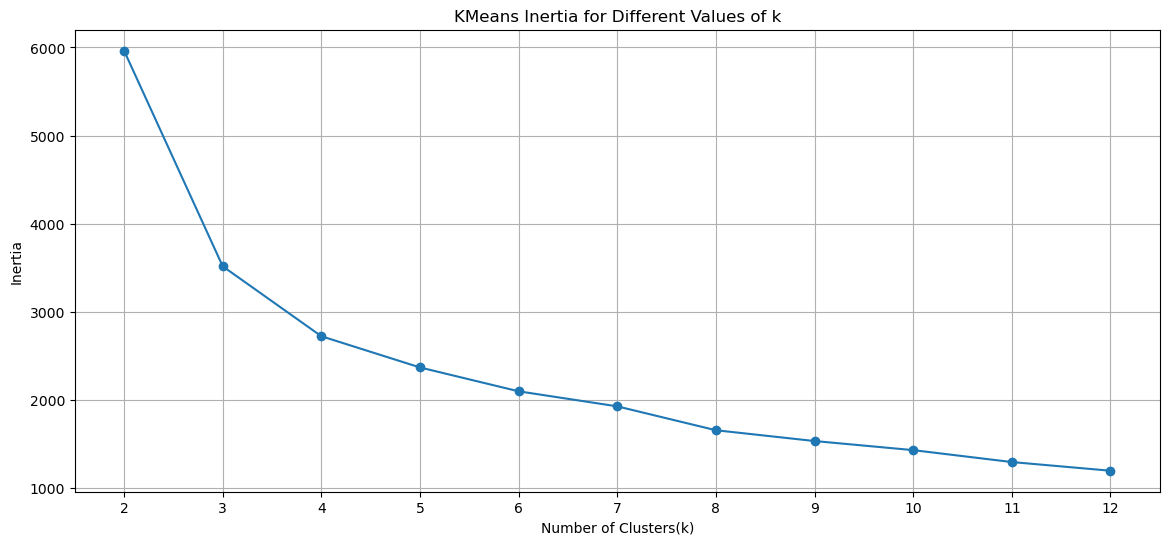

In [6]:
max_k = 12
inertia = []
# starting from to and including 12
k_values = range(2, max_k + 1)

for k in k_values:
    # 1000 iterations to go through before stopping the search for inertia
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    # Fit and predict on the data
    kmeans.fit_predict(df)

    # Save the average distance between the cluster centres and the data points in each cluster
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
# plt.savefig('Elbow_Method.png', dpi=300)
plt.show()

---
#### Insight:
##### The allocated elbow is at 4 clusters
---

#### Evaluating the cluster quality using Silhouette Score 
##### (high score close to 1 = little to no overlap/shadow from cluster silhouette)
##### (low score close to 0 = significantly overlapping clusters)

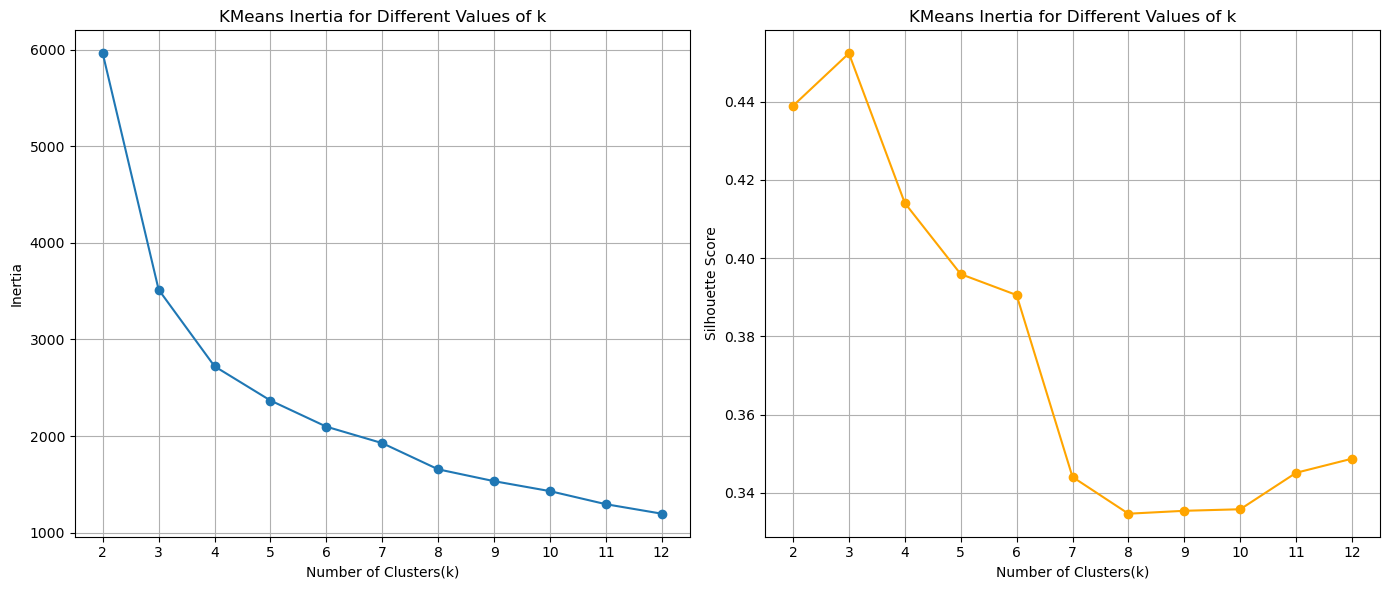

In [9]:
max_k = 12
inertia = []
# capture the silhouette score
silhouette_scores = []
# starting from to and including 12
k_values = range(2, max_k + 1)

for k in k_values:
    # 1000 iterations to go through before stopping the search for inertia
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    # Capture the predicted cluster labels
    cluster_labels = kmeans.fit_predict(df)

    # compare the silhouette score to the cluster labels
    sil_score = silhouette_score(df, cluster_labels)

    # Append the silhouette scores
    silhouette_scores.append(sil_score)
    
    # Save the average distance between the cluster centres and the data points in each cluster
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
# plt.savefig('Elbow_Method.png', dpi=300)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
# plt.savefig('Elbow_Method_and_Silhouette.png', dpi=300)
plt.show()

---
#### Insight:
##### k = 4 has a greater silhouette score than k = 5
##### minimum number of clusters reduces complexity for further analysis
---

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(df)
cluster_labels

array([1, 0, 3, ..., 3, 0, 1])

In [12]:
df["Cluster"] = cluster_labels

In [13]:
df

,MonetaryValue,Frequency,Recency,Cluster
0,-0.012843,0.283812,-0.208110,1
1,0.911527,-0.841317,-0.815769,0
2,-0.685807,-0.841317,2.341887,3
3,0.812912,2.534072,-0.631301,2
4,-0.967879,-0.841317,1.191675,3
...,...,...,...,...
3664,-0.851288,-0.841317,-0.218961,0
3665,-0.842087,-0.841317,1.994653,3
3666,-0.979113,-0.841317,0.942101,3
3667,-0.845589,-0.278753,-0.935130,0


#### Plotting the clusters as a 3D Scatter Plot

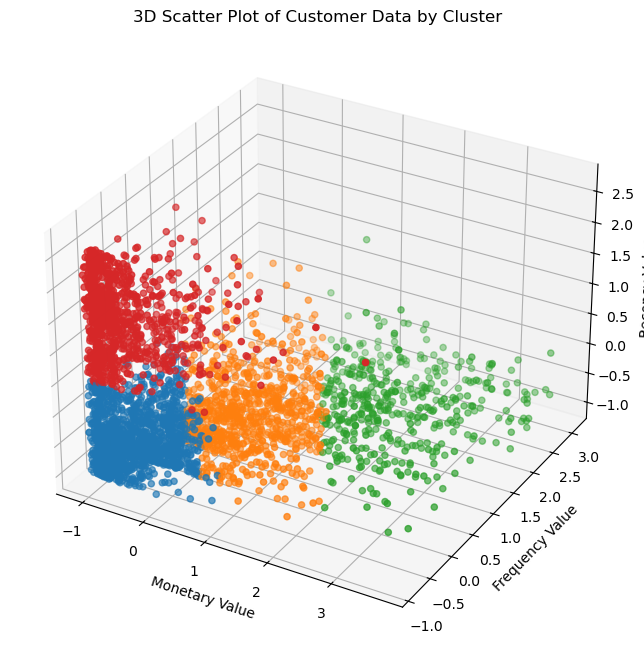

In [15]:
# create a solid color map to distinguish each cluster
cluster_colors = {0: '#1f77b4', # Blue
                  1: '#ff7f0e', # Orange
                  2: '#2ca02c', # Green
                  3: '#d62728'} # Red

colors = df['Cluster'].map(cluster_colors)

# set the figure
fig = plt.figure(figsize=(8, 8))

# set the axis
ax = fig.add_subplot(projection="3d")

# create the scatter
scatter = ax.scatter(df["MonetaryValue"], 
                     df["Frequency"], 
                     df["Recency"], 
                     c=colors,
                     marker='o'
                    )

# add labels
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency Value")
ax.set_zlabel("Recency Value")

# set the title of the plot
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# plt.savefig('3D_Scatter_Plot_of_Clustered_Customer_Data(scaled).png', dpi=300)
plt.show()

#### Cluster Analysis of non-outlier data using violin plot
##### Capturing the frequency distribution of the data mirrored against the y axis
##### Boxplot in the centre of violins

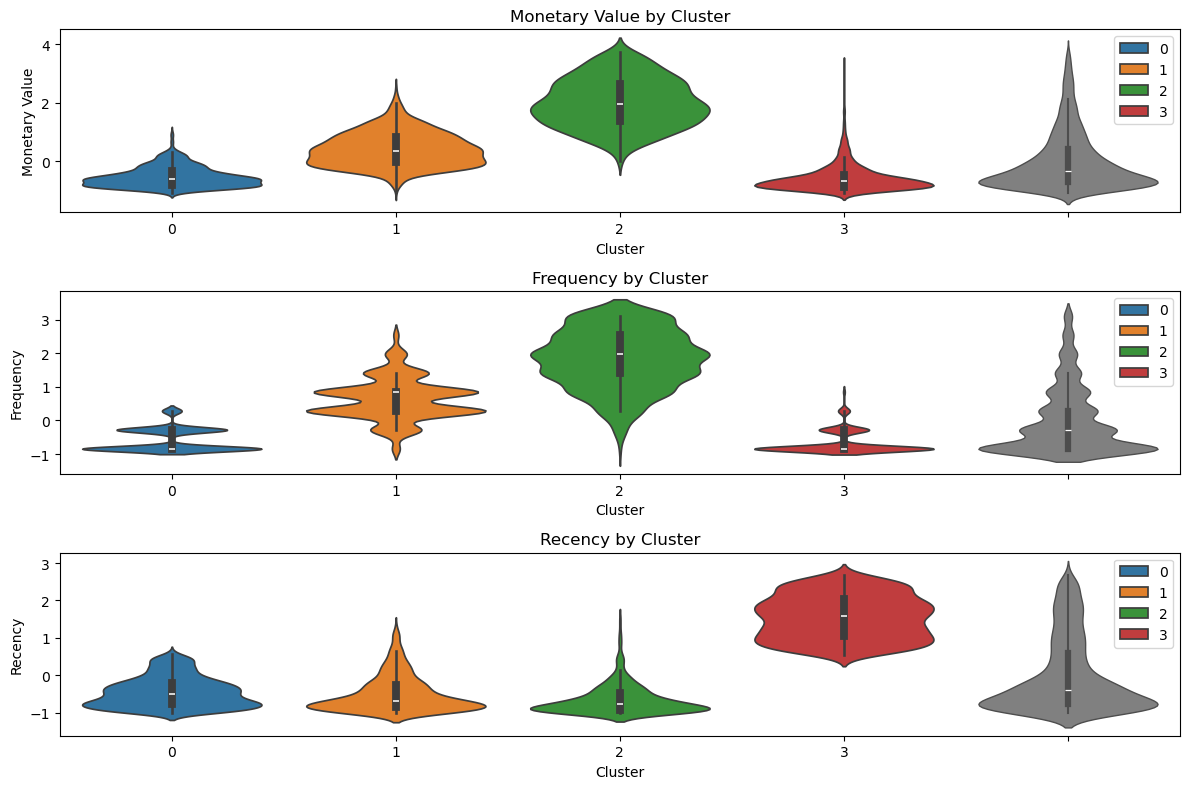

In [17]:
plt.figure(figsize=(12,8))
# using seaborn palette and hue together rather than color_map
plt.subplot(3,1,1)
sns.violinplot(x=df["Cluster"], y=df["MonetaryValue"], palette=cluster_colors, hue=df['Cluster'])
sns.violinplot(y=df["MonetaryValue"], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=df["Cluster"], y=df["Frequency"], palette=cluster_colors, hue=df['Cluster'])
sns.violinplot(y=df["Frequency"], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=df["Cluster"], y=df['Recency'], palette=cluster_colors, hue=df['Cluster'])
sns.violinplot(y=df["Recency"], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
# plt.savefig('RFM_violinplot_distributions.png', dpi=300)
plt.show()

##### Labels of 0, 1, 2 and 3 are not meaningful
##### Looking at the different clusters for the non outlier data
##### Cluster 0 (Blue): UPSELL
###### This cluster represents high-value customers who tend to spend
###### more on average and have a wide range of transaction frequencies.
###### The recency values are quite spread out indicating that some 
######  customers have made recent purchases while others have not.
##### Cluster 1 (Orange): LOYALTY
###### This cluster represents the frugalists (Budget-conscious).
###### Transactions are fairly frequent and suggest regular shoppers.
###### Recency values indicate a moderate recency range, implying
###### balanced engagement.
##### Cluster 2 (Green): ENGAGEMENT
###### Recency values are more uniform indicating that customers are
###### actively engaged and make frequent purchases. Therefore,
###### frequency values for transactions tend to be high while monetary
###### values are moderate.
##### Cluster 3 (Red): ACTIVATION
###### This cluster has a wider range of monetary values, but not as
###### high as Cluster 0. 
###### The frequency is on the lower end, indicating infrequent
###### shopping habits.
###### The recency values are higher, showing that many customers have
###### not shopped recently.